## 롯데 멤버쉽 고객 온라인 쇼핑 데이터 분석
#### 데이터 불러오기 및 전처리

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic') 

In [2]:
import os 
os.chdir("C:/Users/sanghyun/Desktop/새 폴더/제6회 L.POINT Big Data Competition")

In [3]:
online_info= pd.read_csv('lotte_oniline_action_info.csv',engine='python')

In [4]:
transaction=pd.read_csv('lotte_transaction_info.csv',engine='python')

In [5]:
goods=pd.read_csv('lotte_goods_classification_info.csv',engine='python')

In [6]:
transaction['pd_c']=transaction.pd_c.replace('unknown',np.nan).astype('float')

In [7]:
goods.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1667 entries, 0 to 1666
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   pd_c      1667 non-null   int64 
 1   clac_nm1  1667 non-null   object
 2   clac_nm2  1667 non-null   object
 3   clac_nm3  1665 non-null   object
dtypes: int64(1), object(3)
memory usage: 52.2+ KB


In [8]:
transaction=pd.merge(transaction,goods.loc[:,['pd_c','clac_nm1','clac_nm2']],on='pd_c')

In [9]:
goods

,pd_c,clac_nm1,clac_nm2,clac_nm3
0,1,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Automobile Oil / Additives
1,2,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Lights
2,3,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Car Paint
3,4,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Filters
4,5,Automotive Products,Automotive Replacement Repair / Maintanance Kits,Wiper Blades
...,...,...,...,...
1662,1663,Women's Clothing,Women's Upper Bodywear / Tops,Women's Cardigans
1663,1664,Women's Clothing,Women's Upper Bodywear / Tops,Women's Sweaters / Pullover
1664,1665,Women's Clothing,Women's Upper Bodywear / Tops,Women's Sweatshirts / Hoodies
1665,1666,Women's Clothing,Women's Upper Bodywear / Tops,Women's T-shirts / Tops


In [10]:
customer=pd.read_csv('lotte_customer_demographic_info.csv',engine='python')

In [11]:
online_info.head()

,clnt_id,sess_id,hit_seq,action_type,biz_unit,sess_dt,hit_tm,hit_pss_tm,trans_id,sech_kwd,tot_pag_view_ct,tot_sess_hr_v,trfc_src,dvc_ctg_nm
0,7809,1,8,5,A03,20190913,01:16,2571103,NaN,NaN,34.0,2663.0,DIRECT,NaN
1,7809,1,4,2,A03,20190913,01:14,2485909,NaN,NaN,34.0,2663.0,DIRECT,NaN
2,7809,1,11,5,A03,20190913,01:17,2646597,NaN,NaN,34.0,2663.0,DIRECT,NaN
3,7809,1,1,2,A03,20190913,00:46,788304,NaN,NaN,34.0,2663.0,DIRECT,NaN
4,7809,1,9,5,A03,20190913,01:17,2617609,NaN,NaN,34.0,2663.0,DIRECT,NaN


In [12]:
online_info.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3196362 entries, 0 to 3196361
Data columns (total 14 columns):
 #   Column           Dtype  
---  ------           -----  
 0   clnt_id          int64  
 1   sess_id          int64  
 2   hit_seq          int64  
 3   action_type      int64  
 4   biz_unit         object 
 5   sess_dt          int64  
 6   hit_tm           object 
 7   hit_pss_tm       int64  
 8   trans_id         float64
 9   sech_kwd         object 
 10  tot_pag_view_ct  float64
 11  tot_sess_hr_v    float64
 12  trfc_src         object 
 13  dvc_ctg_nm       object 
dtypes: float64(3), int64(6), object(5)
memory usage: 341.4+ MB


In [13]:
online_info.describe()

,clnt_id,sess_id,hit_seq,action_type,sess_dt,hit_pss_tm,trans_id,tot_pag_view_ct,tot_sess_hr_v
count,3.196362e+06,3.196362e+06,3.196362e+06,3.196362e+06,3.196362e+06,3.196362e+06,56989.000000,3.194934e+06,3.138755e+06
mean,3.743773e+04,2.095944e+01,1.807125e+01,2.574070e+00,2.019081e+07,8.266403e+05,76363.908017,4.573830e+01,1.653183e+03
std,2.056772e+04,3.362655e+01,2.228087e+01,1.850338e+00,8.179515e+01,1.074719e+06,21731.295983,4.677333e+01,1.610989e+03
min,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,2.019070e+07,0.000000e+00,38728.000000,1.000000e+00,1.000000e+00
25%,1.990900e+04,3.000000e+00,3.000000e+00,1.000000e+00,2.019072e+07,1.227002e+05,57404.000000,1.500000e+01,4.960000e+02
50%,3.755400e+04,9.000000e+00,1.000000e+01,2.000000e+00,2.019081e+07,4.278215e+05,76548.000000,3.200000e+01,1.197000e+03
75%,5.570400e+04,2.500000e+01,2.400000e+01,5.000000e+00,2.019091e+07,1.122707e+06,95531.000000,6.100000e+01,2.300000e+03
max,7.242900e+04,5.500000e+02,3.570000e+02,7.000000e+00,2.019093e+07,2.700729e+07,112951.000000,4.640000e+02,2.763500e+04


In [14]:
online_info.isnull().sum()

clnt_id                  0
sess_id                  0
hit_seq                  0
action_type              0
biz_unit                 0
sess_dt                  0
hit_tm                   0
hit_pss_tm               0
trans_id           3139373
sech_kwd           2544724
tot_pag_view_ct       1428
tot_sess_hr_v        57607
trfc_src                 0
dvc_ctg_nm         1782577
dtype: int64

In [15]:
# 컬럼정의서에는 오프라인 정보라고 하였으나 오프라인에서 검색이 다수 있다는 것은 말이 안되므로 신뢰도가 부족한 컬럼 제거
online_info=online_info.drop('biz_unit',axis=1)

#### 접속기기를 알 수 없는 오가닉 데이터가 전체의 절반이 넘음

In [16]:
online_info.dvc_ctg_nm.isnull().sum()/online_info.shape[0]

0.5576893355633686

### 1) 온라인 행동유형 분석

#### - 행동 유형 비중

In [17]:
online_info.dvc_ctg_nm.value_counts(normalize=True)

mobile_web    0.475982
mobile_app    0.335878
PC            0.188140
Name: dvc_ctg_nm, dtype: float64

- 접속기기는 모바일 비중이 높다 웹이 제일높고 그다음이 앱인데 전체 중 81%가 모바일로 접속한다.
- 더 상세화하기 위해 행동유형별 접속기기를 분석해 본다.

#### - 종류
#### 0.검색 / 1.제품 목록 / 2.제품 세부정보 보기 / 3.장바구니 제품 추가 /  
#### 4.장바구니 제품 삭제 / 5.결제 시도 / 6.구매 완료 / 7.구매 환불 / 8.결제 옵션

In [18]:
dict={0:'0검색',1:'1제품목록',2:'2세부정보', 3: '3장바구니',4:'4장바구니삭제',5:'5결제시도',6:'6구매완료',7:'7환불',8:'8결제옵션'}

In [19]:
dict

{0: '0검색',
 1: '1제품목록',
 2: '2세부정보',
 3: '3장바구니',
 4: '4장바구니삭제',
 5: '5결제시도',
 6: '6구매완료',
 7: '7환불',
 8: '8결제옵션'}

#### - 행동유형과 접속기기로 구분된 이중 파이차트 그리기

In [20]:
online_info['행동정보']=[dict[i] for i in online_info.action_type]

In [21]:
at2=online_info.groupby(['action_type','dvc_ctg_nm'])['clnt_id'].count().reset_index()

In [22]:
at2=at2.sort_values(by='dvc_ctg_nm',ascending=False)

In [23]:
group_names=at2.action_type
group_sizes=at2.clnt_id

In [24]:
subgroup_names=at2.dvc_ctg_nm
subgroup_sizes=at2.clnt_id

In [25]:
# info. of groups

group_names = group_names

group_sizes = group_sizes



# info. of subgroups

subgroup_names = subgroup_names
subgroup_sizes = subgroup_sizes


# width

width_num = 0.4

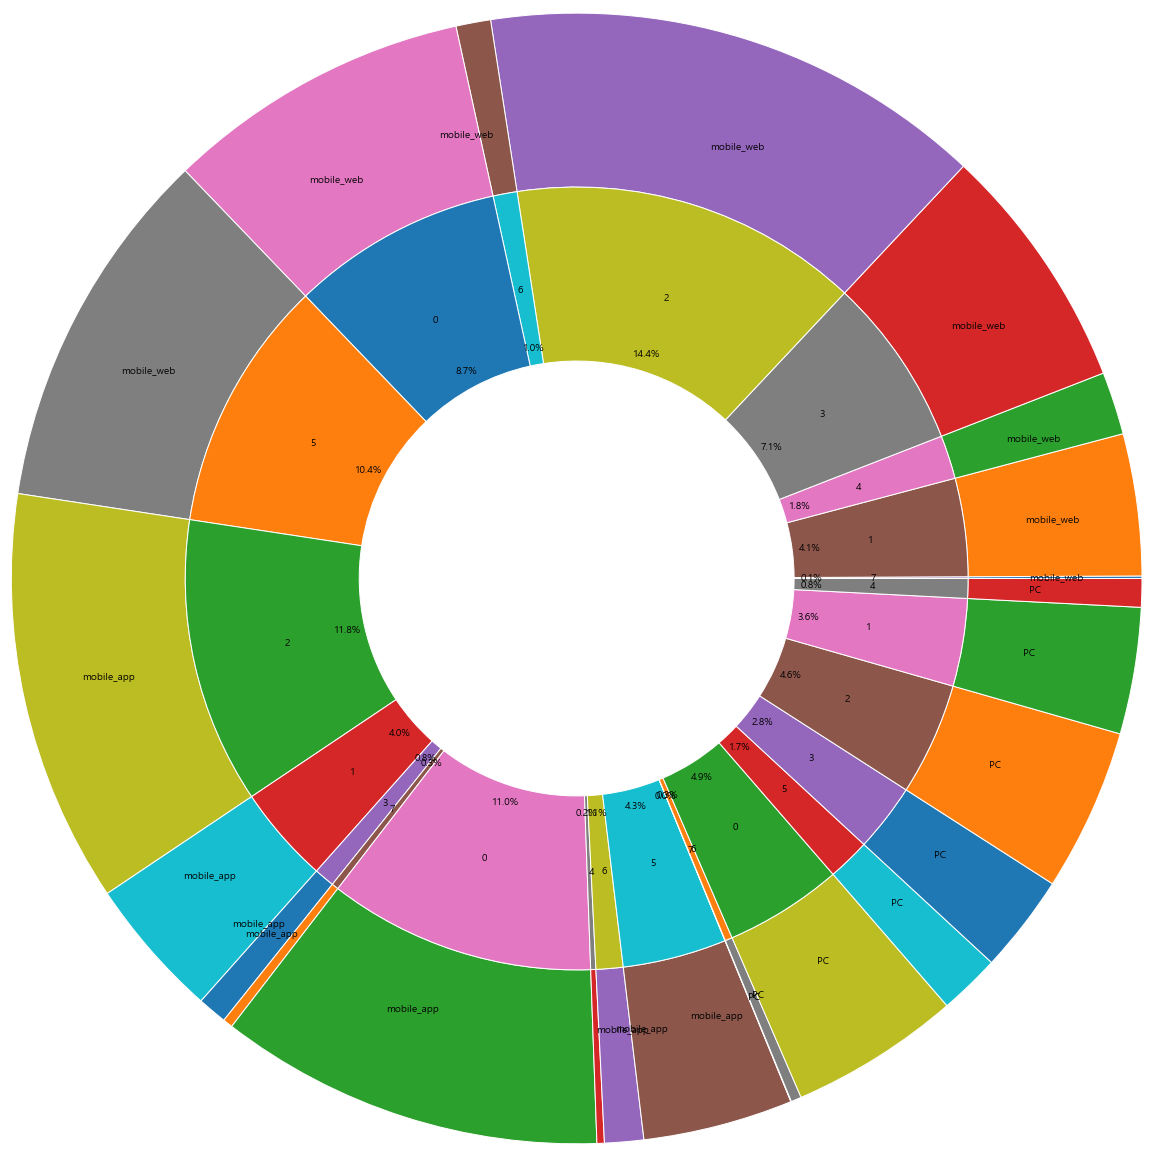

In [26]:
# Outside Ring
pie, ax = plt.subplots(figsize=[20,20])

pie_outside, _ = ax.pie(subgroup_sizes, 

                        radius=1.3,

                        labels=subgroup_names, 

                        labeldistance=0.8)

plt.setp(pie_outside, 

         width=width_num, 

         edgecolor='white')



# Inside Ring

pie_inside, plt_labels, junk = ax.pie(group_sizes, 

           radius=(1.3 - width_num), 

           labels=group_names, 

           labeldistance=0.75, 

           autopct='%1.1f%%')

plt.setp(pie_inside, 

         width=width_num, 

         edgecolor='white')

plt.show()


#### 접속기기와 행동유형을 고려하여 분석하면 접속 기기별로 주로 활동하는 행동유형이 다른 것을 알 수 있다.
- PC는 검색>제품 세부정보 보기>장바구니 추가 순이다.
- 모바일app은 세부정보보기>검색>결제시도 순이다.
- 모바일 web은 세부정보보기>결제시도>검색순이다.
    일부 오가닉 데이터를 제외한 데이터에서 모바일 접속 기준이 높으며 모바일 고객은 결제시도의 비중이 높은 것을 알 수 있다.
    반면, pc의 경우는 검색 후 장바구니에 넣고 제품목록으로 가는 가격 비교 고객이 많다.

#### - 각 퍼널 시각화 및 분석

In [27]:
online_info.행동정보.value_counts(normalize=True)

5결제시도      0.234808
2세부정보      0.205004
0검색        0.203869
3장바구니      0.186701
1제품목록      0.096359
4장바구니삭제    0.053886
6구매완료      0.017598
7환불        0.001776
Name: 행동정보, dtype: float64

In [28]:
#grouped= online_info.groupby('행동정보')['hit_tm'].count()
#from plotly import graph_objects as go

#fig = go.Figure(go.Funnel(
#    y = np.sort(online_info.행동정보.unique()).tolist(),
#    x = grouped.values.tolist()))

#fig.show()

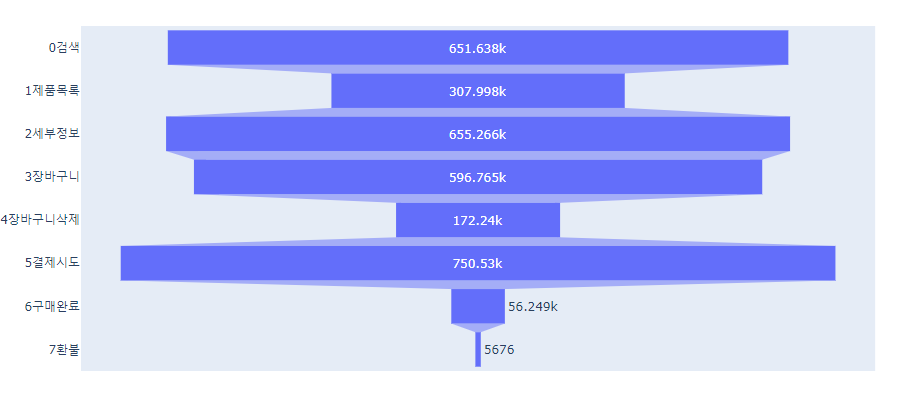

In [29]:
# jupyter notebook에서는 plotly의 그래프를 출력할 수 있으나, github에서 안되는 경우가 많아서 출력결과를 이미지로 대체한다.
from IPython.display import Image
Image('funnel.png')

- 가장 큰 특징은 결제시도에 비해 구매완료에 해당하는 고객이 매우 작은 점이다.

### 2) 고객 분석

#### 데이터 전처리

In [30]:
customer

,clnt_id,clnt_gender,clnt_age
0,1,unknown,unknown
1,2,F,30
2,3,unknown,unknown
3,4,unknown,unknown
4,5,unknown,unknown
...,...,...,...
72394,72425,unknown,unknown
72395,72426,unknown,unknown
72396,72427,unknown,unknown
72397,72428,unknown,unknown


In [31]:
customer['clnt_gender']=customer.clnt_gender.replace('unknown',np.nan)

In [32]:
customer['clnt_age']=customer['clnt_age'].replace('unknown',np.nan)

In [33]:
transaction['pd_c']=transaction['pd_c'].replace('unknown',np.nan)

In [34]:
transaction=transaction.dropna()

In [35]:
customer=pd.merge(customer,transaction,on='clnt_id',how='inner')

In [36]:
customer.columns=['clnt_id', '성별', 'age', 'trans_id', '거래일련번호',
       'biz_unit', 'pd_c', '구매일자', '구매시각', '구매금액', '구매수량','상품대분류','상품중분류']

In [37]:
customer

,clnt_id,성별,age,trans_id,거래일련번호,biz_unit,pd_c,구매일자,구매시각,구매금액,구매수량,상품대분류,상품중분류
0,2,F,30,88495,2,A03,1395.0,20190830,22:00,2850,1,Substitute Foods,Instant Noodles
1,2,F,30,88495,3,A03,1395.0,20190830,22:00,5700,2,Substitute Foods,Instant Noodles
2,2,F,30,88495,1,A03,1395.0,20190830,22:00,3590,1,Substitute Foods,Instant Noodles
3,2,F,30,64691,2,A03,151.0,20190731,21:25,3990,1,Canned / Jarred Foods,Canned Agricultural Foods
4,2,F,30,64691,4,A03,189.0,20190731,21:25,4290,1,Chilled Foods,Fish Cakes and Crab Sticks
...,...,...,...,...,...,...,...,...,...,...,...,...,...
582304,72424,M,40,136530,3,B01,213.0,20190718,20:05,19800,1,Cleaning / Laundry / Bathroom Accessories,Bathroom Fixtures
582305,72424,M,40,136530,1,B01,70.0,20190718,20:05,10000,1,Bedding / Handicraft,Adults' Bedding
582306,72424,M,40,85065,1,A01,1316.0,20190826,11:54,99000,1,Sport Fashion,Women's Sport Shoes
582307,72424,M,40,85066,1,A01,1316.0,20190826,11:56,99000,1,Sport Fashion,Women's Sport Shoes


In [38]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582309 entries, 0 to 582308
Data columns (total 13 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   clnt_id   582309 non-null  int64  
 1   성별        582309 non-null  object 
 2   age       582309 non-null  object 
 3   trans_id  582309 non-null  int64  
 4   거래일련번호    582309 non-null  int64  
 5   biz_unit  582309 non-null  object 
 6   pd_c      582309 non-null  float64
 7   구매일자      582309 non-null  int64  
 8   구매시각      582309 non-null  object 
 9   구매금액      582309 non-null  int64  
 10  구매수량      582309 non-null  int64  
 11  상품대분류     582309 non-null  object 
 12  상품중분류     582309 non-null  object 
dtypes: float64(1), int64(6), object(6)
memory usage: 62.2+ MB


In [39]:
cumstomer=customer.dropna()

In [40]:
customer['총구매금액']=customer['구매금액']*customer['구매수량']

In [41]:
customer.groupby(['clnt_id','trans_id'])['거래일련번호'].count()

clnt_id  trans_id
2        42449        1
         62037        1
         64691        5
         65505        1
         72330        1
                     ..
72424    85066        1
         108309      11
         108506       2
         136530      11
         136596      42
Name: 거래일련번호, Length: 115260, dtype: int64

In [42]:
customer.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 582309 entries, 0 to 582308
Data columns (total 14 columns):
 #   Column    Non-Null Count   Dtype  
---  ------    --------------   -----  
 0   clnt_id   582309 non-null  int64  
 1   성별        582309 non-null  object 
 2   age       582309 non-null  object 
 3   trans_id  582309 non-null  int64  
 4   거래일련번호    582309 non-null  int64  
 5   biz_unit  582309 non-null  object 
 6   pd_c      582309 non-null  float64
 7   구매일자      582309 non-null  int64  
 8   구매시각      582309 non-null  object 
 9   구매금액      582309 non-null  int64  
 10  구매수량      582309 non-null  int64  
 11  상품대분류     582309 non-null  object 
 12  상품중분류     582309 non-null  object 
 13  총구매금액     582309 non-null  int64  
dtypes: float64(1), int64(7), object(6)
memory usage: 66.6+ MB


In [43]:
customer['구매일자']=pd.to_datetime(customer.구매일자.astype('str'),format='%Y%m%d')

#### 고객 데이터에서 가입일을 알 수 없으므로 리텐션은 추출할 수 없고 
#### - 고객들의 평균구매가치(APV) 구하기

In [44]:
print( '롯데멤버쉽 온라인 쇼핑의 APV는 %.2f 이다.'% round(customer['총구매금액'].sum()/len(customer.trans_id.unique()),2))

롯데멤버쉽 온라인 쇼핑의 APV는 1646449.47 이다.


#### - 평균구매빈도율(APFR) 구하기

In [45]:
print( '롯데멤버쉽 온라인 쇼핑의 APFR는 %.2f 이다.'% round(len(customer.trans_id.unique())/len(customer.clnt_id.unique()),2))

롯데멤버쉽 온라인 쇼핑의 APFR는 10.23 이다.


#### - 고객별 LTR(Life time Revenue) 구하기 -CAC를 구할 수 없기 때문에 고객의 가치를 파악하기 위해 사용함

In [46]:
ltr_cust=customer.groupby('clnt_id')['총구매금액'].sum().sort_values(ascending=False)
ltr_cust

clnt_id
50600    100015896647
43143     36655608845
63500     31586420228
5492       2722131490
70438       695698210
             ...     
30509               0
27623               0
59321               0
59282               0
39693               0
Name: 총구매금액, Length: 11271, dtype: int64

In [47]:
ltr_cust=ltr_cust.reset_index()
ltr_cust['ltr_rank']=[ i+1 for i in range(ltr_cust.shape[0])]

In [48]:
ltr_cust.columns=['clnt_id', 'ltr', 'ltr_rank']

In [49]:
customer=pd.merge(customer,ltr_cust,on='clnt_id').sort_values(by='ltr_rank')

#### 고객별 ltr의 성별 평균은 다음과 같다.
    중복을 제거하고 성별 Life Time Revenue를 구한다.

In [50]:
gender_cus=customer.loc[:,['clnt_id','성별','ltr']].drop_duplicates().groupby('성별')['ltr'].mean()
gender_cus

성별
F    1.228932e+07
M    4.339176e+07
Name: ltr, dtype: float64

([<matplotlib.patches.Wedge at 0x22384517408>,
 [Text(0.8460004408244544, 0.703052810338476, 'F'),
  Text(-0.8460003749998959, -0.7030528895467507, 'M')],
 [Text(0.46145478590424777, 0.3834833510937141, '22.1%'),
  Text(-0.4614547499999432, -0.3834833942982276, '77.9%')])

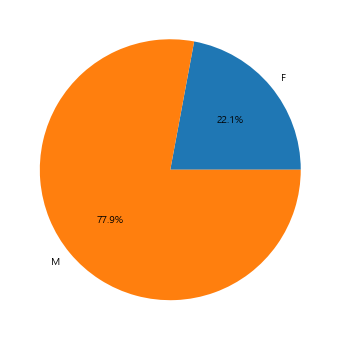

In [51]:
pie, ax = plt.subplots(figsize=[6,6])
plt.pie(gender_cus,labels=gender_cus.index,autopct='%1.1f%%')

- 평균적으로 남성의 경우가 여성의 경우보다 LTR의 평균이 높다.
- LTR은 고객이 해당 서비스를 이용하는 동안 결제하는 총 금액이다.
- 즉, 남성고객을 유치하는 쪽이 롯데맴버쉽이 가입된 온라인 몰에서는 회사에 매출액을 증대하는데 더 도움이 된다.

#### - 성별 데이터를 요일데이터로 세분화하여 구분하기
    한개의 년도에 3개월간의 데이터이므로, 요일만 사용하여 세분화한다. 

In [52]:
customer['요일']=customer.구매일자.dt.day_name()

In [53]:
gd_weekday_cus=customer.loc[:,['clnt_id','성별','요일','ltr']].drop_duplicates().groupby(['성별','요일'])['ltr'].mean()

In [54]:
gd_weekday_cus=gd_weekday_cus.reset_index()

Text(0.5, 1.0, '요일별 성별 총 결제금액의 평균')

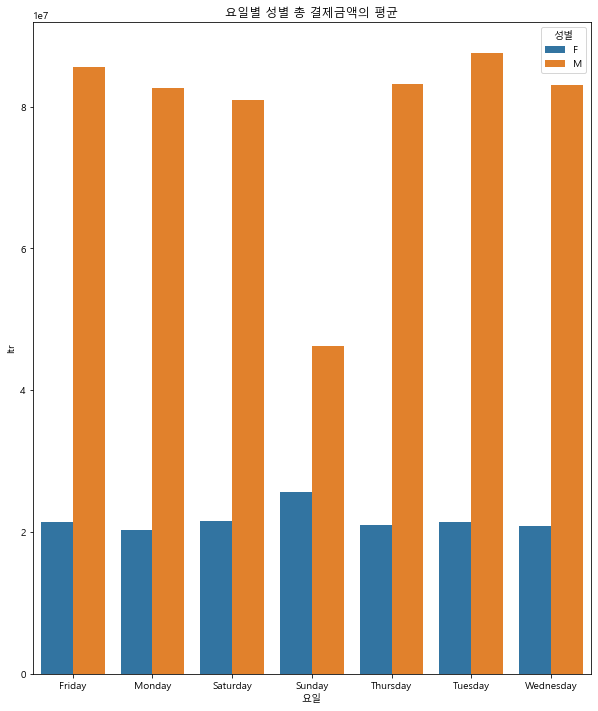

In [55]:
plt.rc('font', family='Malgun Gothic') 
pie, ax = plt.subplots(figsize=[10,12])
sns.barplot(x='요일',y='ltr',data=gd_weekday_cus,hue='성별')
plt.title("요일별 성별 총 결제금액의 평균")

- 요일별로 분석하면, 일요일에 결제하는 고객이 금액이 제일 적고 남녀 요일별 총 결제금액의 편차도 제일 적음(여자 결제금액이 올라감)

#### 사용자별 성별 상품대분류별 총결제금액의 평균

In [56]:
gd_goods_cus=customer.loc[:,['clnt_id','성별','상품대분류','ltr']].drop_duplicates().groupby(['성별','상품대분류'])['ltr'].mean().sort_values(ascending=False).reset_index()
gd_goods_cus

,성별,상품대분류,ltr
0,M,Home Decor / Lighting,6.744499e+08
1,M,Outdoor / Leisure Activities,4.454466e+08
2,M,Toy,2.610772e+08
3,M,Coffee / Tea,2.476542e+08
4,M,Health Foods,2.215066e+08
...,...,...,...
114,F,Computers,1.621885e+06
115,M,Tobacco,1.576237e+06
116,M,Travel / Leisure Services,1.524332e+06
117,F,Gift Certificates / Cards,1.437102e+06


In [57]:
gd_goods_cus.groupby('성별')['ltr'].max()

성별
F    1.184085e+08
M    6.744499e+08
Name: ltr, dtype: float64

In [58]:
gd_goods_cus.iloc[10,:]

성별                                  F
상품대분류    Tableware / Cooking Utensils
ltr                  118408487.752283
Name: 10, dtype: object

- 여성 결제총금액 최대값과 해당 제품

In [59]:
gd_goods_cus.iloc[0,:]

성별                           M
상품대분류    Home Decor / Lighting
ltr           674449917.638298
Name: 0, dtype: object

- 남성 결제총금액 최대값과 해당 제품

#### 남성과 여성의 총결제금액 평균 상위 10개 품목

In [60]:
gd_goods_cus.query("성별=='M'").sort_values(by='ltr',ascending=False).iloc[:10,:]

,성별,상품대분류,ltr
0,M,Home Decor / Lighting,6.744499e+08
1,M,Outdoor / Leisure Activities,4.454466e+08
2,M,Toy,2.610772e+08
3,M,Coffee / Tea,2.476542e+08
4,M,Health Foods,2.215066e+08
5,M,Cosmetics / Beauty Care,2.120455e+08
6,M,Underwear / Socks and Hosiery / Homewear,1.844922e+08
7,M,Fashion Accessories,1.803650e+08
8,M,Personal Care,1.601491e+08
9,M,Liquors / Alcoholic Beverages,1.547041e+08


In [61]:
gd_goods_cus.query("성별=='F'").sort_values(by='ltr',ascending=False).iloc[:10,:]

,성별,상품대분류,ltr
10,F,Tableware / Cooking Utensils,1.184085e+08
12,F,Health Foods,9.310968e+07
21,F,Tenants / Restaurants,6.841275e+07
23,F,Cooked Foods,5.642759e+07
24,F,Grains,5.625153e+07
25,F,Coffee / Tea,5.521867e+07
26,F,Women's Clothing,5.493654e+07
29,F,Liquors / Alcoholic Beverages,4.067673e+07
30,F,Cosmetics / Beauty Care,3.961295e+07
31,F,Sea Foods,3.778062e+07


- 모든 요일에 남자의 구매가 높으므로 조명기기,아웃도어 및 레저용품,장난감,커피,헬스음식,화장품,속옷이나 실내복,악세사리,술 등의 프로모션을 협력사와 추진하여 경쟁력있는 가격으로 제공해야한다.
- 일요일에는 여성의 총 구매금액이 올라가므로 일요일에 주방조리도구나, 레트로트식품,곡물,여성복,화장품,해산물 등을 집중적으로 프로모션하는 것이 효과가 좋을 것으로 판단된다.

#### 나이대별 총결제금액의 평균

In [62]:
age_cus=customer.loc[:,['clnt_id','age','상품중분류','ltr']].drop_duplicates().groupby(['age','상품중분류'])['ltr'].mean().sort_values(ascending=False).reset_index()
gd_goods_cus
age_cus

,age,상품중분류,ltr
0,40,Sprits / Liquors,4.778827e+09
1,40,Snack Sets,1.755680e+09
2,40,Canned Food Gift Sets,1.436855e+09
3,30,Coffee Sets and Tea Sets,1.416474e+09
4,40,Dried Sea Food Gift Sets,1.359140e+09
...,...,...,...
1563,20,Office / Student's Furniture,1.976000e+04
1564,30,Other Furniture,1.718000e+04
1565,10,Sport Accessories,1.242000e+04
1566,10,Pies,8.390000e+03


Text(0.5, 1.0, '나이대별 총결제금액의 평균')

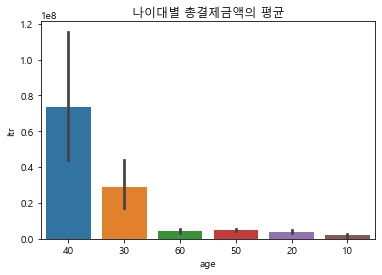

In [63]:
sns.barplot(x='age',y='ltr',data=age_cus.reset_index())
plt.title("나이대별 총결제금액의 평균")

In [64]:
age_cus.query("age=='40'").sort_values(by='ltr',ascending=False).iloc[:10,:]

,age,상품중분류,ltr
0,40,Sprits / Liquors,4.778827e+09
1,40,Snack Sets,1.755680e+09
2,40,Canned Food Gift Sets,1.436855e+09
4,40,Dried Sea Food Gift Sets,1.359140e+09
5,40,Health Extracts,1.335787e+09
6,40,Cooked Side Dishes,9.726213e+08
9,40,Wine,7.497112e+08
10,40,Tableware,6.236951e+08
12,40,Dietary Supplements,5.973588e+08
15,40,Coffee Sets and Tea Sets,5.190684e+08


In [65]:
age_cus.query("age=='30'").sort_values(by='ltr',ascending=False).iloc[:10,:]

,age,상품중분류,ltr
3,30,Coffee Sets and Tea Sets,1.416474e+09
7,30,Fruit Gift Sets,8.790063e+08
8,30,Canned Food Gift Sets,7.803667e+08
11,30,Red Ginsengs / Dried Ginseng Processed Foods,6.158127e+08
13,30,Snack Sets,5.677927e+08
14,30,Dried Fruits,5.513502e+08
17,30,Kids' Socks and Hosiery,4.102483e+08
27,30,Camping,3.085008e+08
30,30,Women's Shoes,2.828413e+08
33,30,Outdoor / Sports Toys,2.014973e+08


- 평균적으로 보면 40대의 고객이 LTR이 앞도적으로 높고 30대가 그 다음이며 10대와 20대는 미미하다.
- 그러므로 마케팅을 주로 30~40대, 그중 특히 40대에 집중할 필요가 있다.
- 40대가 총결제금액 기준으로 가장 선호하는 제품은 증류주,스낵세트,캔음식선물세트,건오징어나 건멸치선물세트,건강즙 등이 있으므로
    해당 제품에 집중하여 프로모션을 진행한다.
- 30대의 경우에는 커피와 차세트를 위주로 프로모션을 진행하는데 위에서 성별 선호 품목에도 커피가 있었으므로 롯데에서는 어느 정도 마진을 낮추더라도 커피를 공격적으로 판매하여 고객들의 리텐션을 올릴 필요가 있다.

In [66]:
online_info=pd.merge(customer,online_info.loc[:,['clnt_id','trfc_src']].drop_duplicates(),on='clnt_id',how='inner')

In [67]:
online_info

,clnt_id,성별,age,trans_id,거래일련번호,biz_unit,pd_c,구매일자,구매시각,구매금액,구매수량,상품대분류,상품중분류,총구매금액,ltr,ltr_rank,요일,trfc_src
0,50600,F,40,143218,1,B01,352.0,2019-07-04,18:52,13400,5,Dairy Products,Processed Milk,67000,100015896647,1,Thursday,DIRECT
1,50600,F,40,143433,4,B01,522.0,2019-09-09,22:20,7160,2,Frozen Foods,Frozen Instant Foods,14320,100015896647,1,Monday,DIRECT
2,50600,F,40,143325,8,B01,278.0,2019-08-09,22:16,1700,1,Cooked Foods,Chilled Snacks,1700,100015896647,1,Friday,DIRECT
3,50600,F,40,143280,9,B01,668.0,2019-07-25,15:33,1780,1,Grains,Rice,1780,100015896647,1,Thursday,DIRECT
4,50600,F,40,143280,8,B01,668.0,2019-07-25,15:33,1780,1,Grains,Rice,1780,100015896647,1,Thursday,DIRECT
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
787389,59321,M,40,46995,3,A03,177.0,2019-07-13,00:50,0,0,Chilled Foods,Chilled Instant Foods,0,0,11269,Saturday,DIRECT
787390,59321,M,40,46995,1,A03,105.0,2019-07-13,00:50,0,0,Beverages,Functional Drinks,0,0,11269,Saturday,DIRECT
787391,59321,M,40,46995,2,A03,1215.0,2019-07-13,00:50,0,0,Snack Foods,Snacks,0,0,11269,Saturday,DIRECT
787392,59282,F,40,56592,1,A02,513.0,2019-07-21,08:45,0,1,Finance / Insurance Service,Insurance Services,0,0,11270,Sunday,unknown


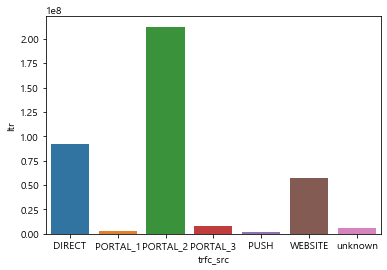

In [68]:
sns.barplot(x='trfc_src',y='ltr',data=online_info.groupby('trfc_src')['ltr'].mean().reset_index())

- 고객유입채널이 Portal_2 > direct > website>portal_3 순으로 사용자별 결제총금액의 평균이 높고 push나 portal_1으로  
    유입된 고객은 총결제금액이 미미하다.

###  3) Action Plan 도출
    a) 접속 경로는 모바일이 70%나 되고 제품별 상세보기 화면이 모든 접속경로에서 상위권에 속할 정도로 꼭 지나가는 화면으로 추천 시스템구현으로 상품추천은 상세보기 화면에서 이루어져야 할 것이다.
    b) 퍼널 시각화를 통해 결제시도에 비해 비정상적으로 결제완료가 적은 것을 확인했으므로, 결제 시도 화면에서 UI/UX나 시스템 속도적인 측면등 여러 측면에서 어떤 문제점이 있는지 파악한다.
    c) 사용자별 총 결제금액의 평균기준으로 남자 고객이 여자 고객에 비해 훨씬 결제금액이 높으므로 남성 고객이 선호하는 상품(조명기구 등)을 기준으로 주로 마케팅을 진행하며, 여성이 주로 선호하는 상품(주방도구 등)은 일요일에 프로모션을 진행한다.
    d) 나이대로는 40대~ 30대 까지를 주로 타겟팅하여 프로모션을 진행한다.증류주와 통조림선물세트는 프로모션 효과가 좋을 것이다.
    e) push는 생각보다 효과가 없고 짜증만 일으킬 수 있어서 push 프로모션은 자제하고, portal_2이 디자인이나 고객 편이성등에서 포탈1과 3의 디자인과 고객편의성과 어떤점에서 차이가 나는지 파악하여 포탈1과 3을 개선한다.
